In [1]:
from scipy.stats import poisson, chi2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [10]:
golosinas = list(
    [
        (0, 1, 2, 3, 4),
        (6, 8, 10, 6, 6),
        (0, 0, 0, 0)
    ]
)
ensayos = 36
n = 4
alfaChi2 = 0.05
probP = 0.517
lamb = 1.94
golosinas[2] = [x/ensayos for x in golosinas[1]]

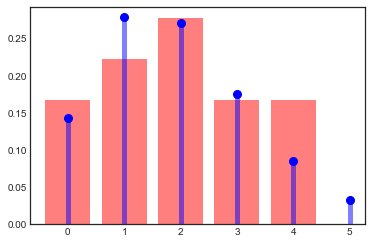

In [13]:
x = np.arange(
    poisson.ppf(0.01, lamb), 
    poisson.ppf(0.99, lamb)
)
curvaP = poisson.pmf(x, lamb)

plt.style.use('seaborn-white')
plt.plot(x, curvaP, 'bo', ms=8)
plt.vlines(x, 0, curvaP, colors='b', lw=5, alpha=0.5)
plt.bar(golosinas[0], golosinas[2], color='r', alpha=0.5)
plt.show()

In [14]:
repeticiones = golosinas[0]
valoresObs = golosinas[1]
probMuestrar = golosinas[2]
tabla_histograma = list(zip(repeticiones,valoresObs))
print(tabulate(tabla_histograma, ['Repeticiones', 'Frecuencia Observadas'], tablefmt="github"))

|   Repeticiones |   Frecuencia Observadas |
|----------------|-------------------------|
|              0 |                       6 |
|              1 |                       8 |
|              2 |                      10 |
|              3 |                       6 |
|              4 |                       6 |


In [17]:
probInt = []
probAcum = 0
for(i) in range(len(golosinas[1])):
    prob = poisson.pmf(golosinas[0][i], lamb)
    print('P(X = ', golosinas[0][i], ') = ', prob)
    probInt.append(prob)
    probAcum += prob

probAcum += prob
print("Acumulado Total = {m}".format(m=probAcum))

valores_esperados = []
for(i) in probInt:
    valores_esperados.append(i*ensayos)


P(X =  0 ) =  0.14370394977770293
P(X =  1 ) =  0.2787856625687437
P(X =  2 ) =  0.2704220926916814
P(X =  3 ) =  0.17487295327395394
P(X =  4 ) =  0.08481338233786766
Acumulado Total = 1.0374114229878173


In [18]:
tableData = list(zip(repeticiones, valoresObs, probInt, valores_esperados))
print(tabulate(tableData, ['Repeticiones', 'Valores', 'Prob', 'Esperado'], tablefmt="github"))

|   Repeticiones |   Valores |      Prob |   Esperado |
|----------------|-----------|-----------|------------|
|              0 |         6 | 0.143704  |    5.17334 |
|              1 |         8 | 0.278786  |   10.0363  |
|              2 |        10 | 0.270422  |    9.7352  |
|              3 |         6 | 0.174873  |    6.29543 |
|              4 |         6 | 0.0848134 |    3.05328 |


In [19]:
chiDePrueba = 0
for(i) in range(len(valores_esperados)):
    chiDePrueba += ((valores_esperados[i] - valoresObs[i])**2)/valores_esperados[i]

print("Chi de Prueba = {m}".format(m=chiDePrueba))

Chi de Prueba = 3.410179613461099


In [20]:
chi2Critico = chi2.ppf(1-alfaChi2, len(valores_esperados)-1)

print("Chi2 Critico = {m}".format(m=chi2Critico))

Chi2 Critico = 9.487729036781154


In [21]:
if chiDePrueba > chi2Critico:
    print("Se rechaza la hipotesis nula")
else:
    print("No se puede rechazar la hipotesis nula")

No se puede rechazar la hipotesis nula
